In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [9]:
# import csv file
df = pd.read_csv("C:/Users/sp792/Dropbox/PC/Downloads/diwali_analysis/project/Diwali Sales Data.csv", encoding= 'unicode_escape')

In [10]:
df.shape

(11251, 15)

In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [16]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df['Amount'] = df['Amount'].astype('int')

In [21]:
df['Amount'].dtypes

dtype('int32')

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [110]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [111]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

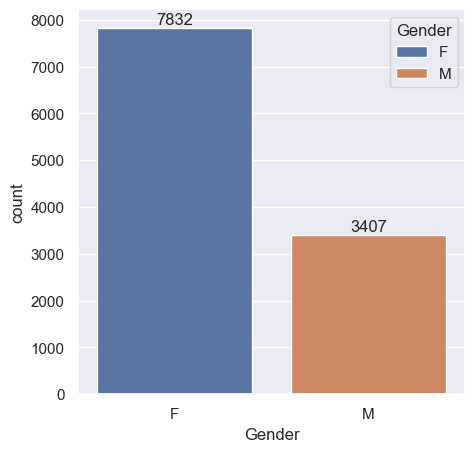

In [117]:
# plotting a bar chart for Gender and it's count
# custom_palette = {'M': 'blue', 'F': 'pink'}
a=sns.countplot(x="Gender",data=df,hue="Gender",legend=True)
sns.set(rc={'figure.figsize':(5,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

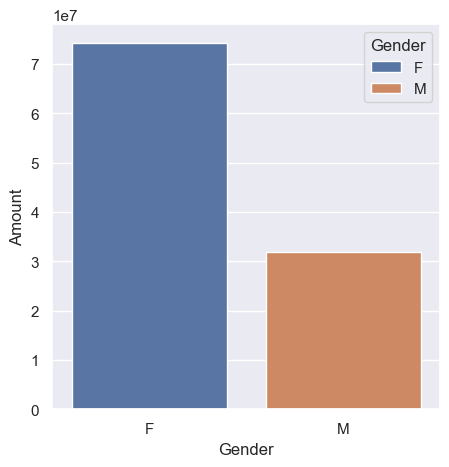

In [116]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue='Gender',legend=True)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

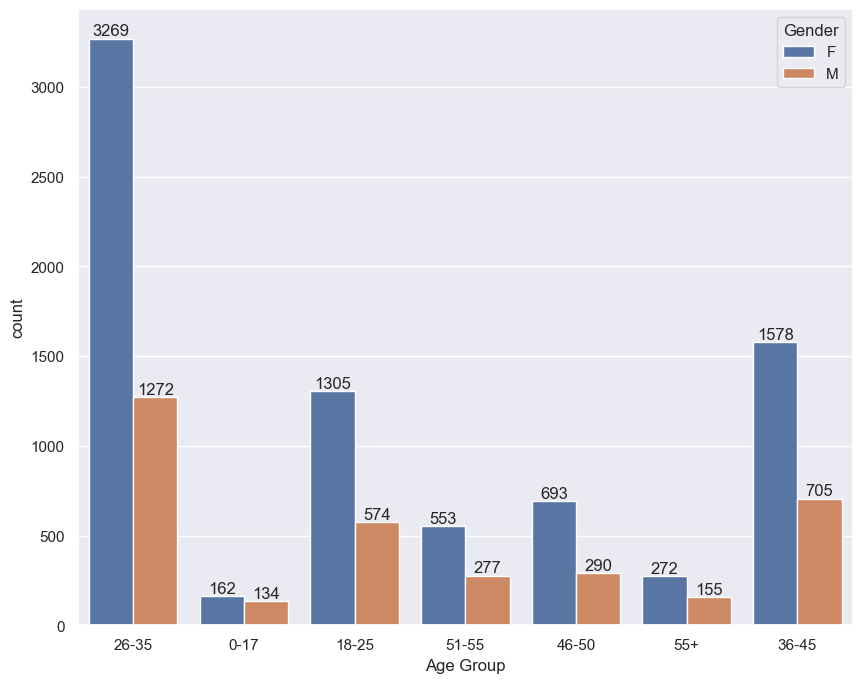

In [119]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
sns.set(rc={'figure.figsize':(13,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

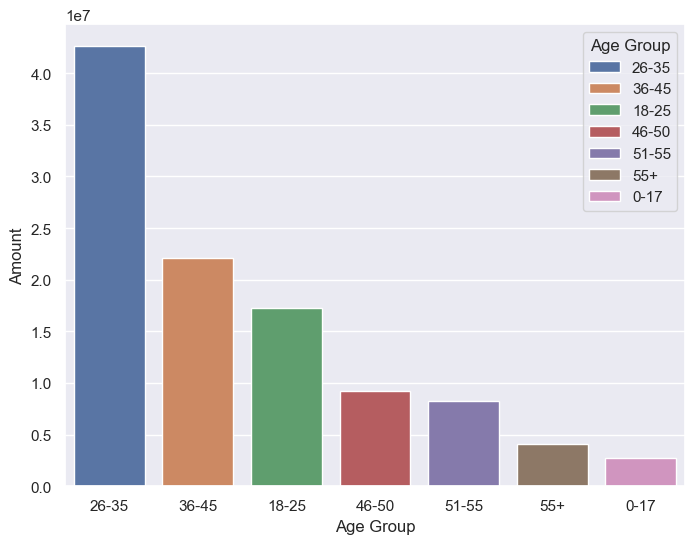

In [122]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue='Age Group',legend=True)

**From above graphs we can see that most of the buyers are of age group between 26-35 yrs female**

### State

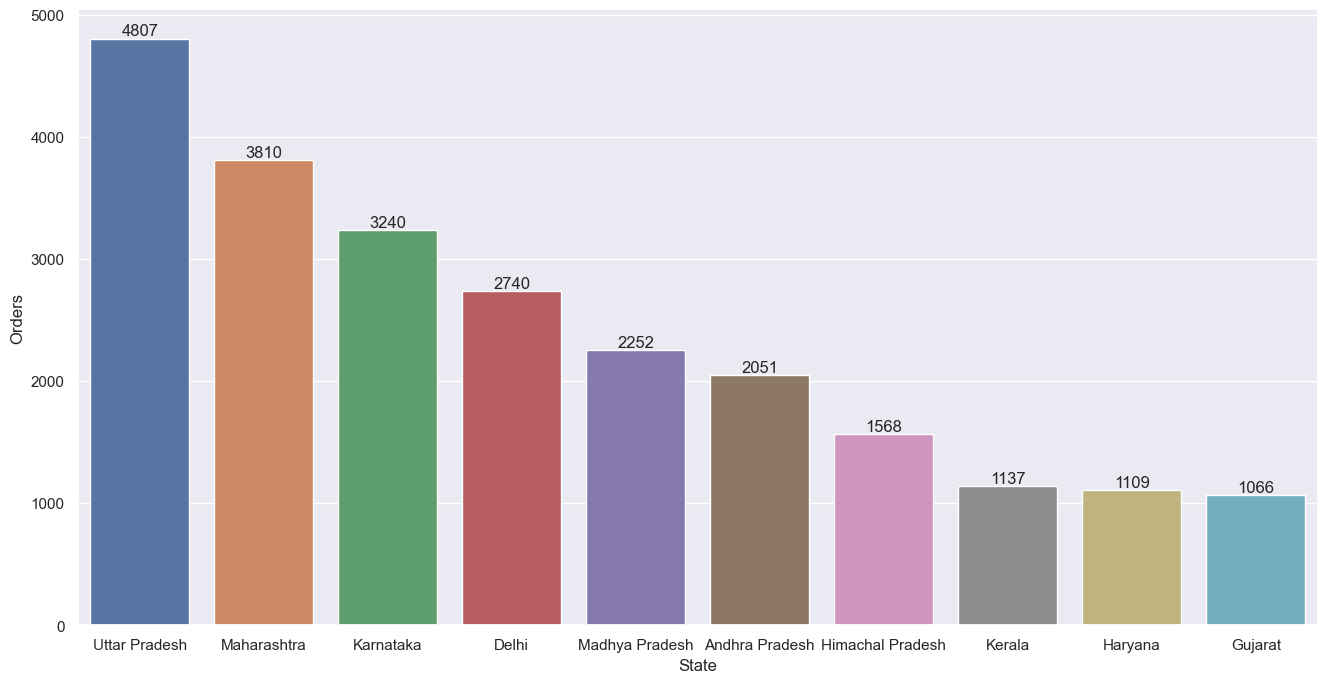

In [123]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,8)})
x=sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State')
for i in x.containers:
    x.bar_label(i,)

<Axes: xlabel='State', ylabel='Amount'>

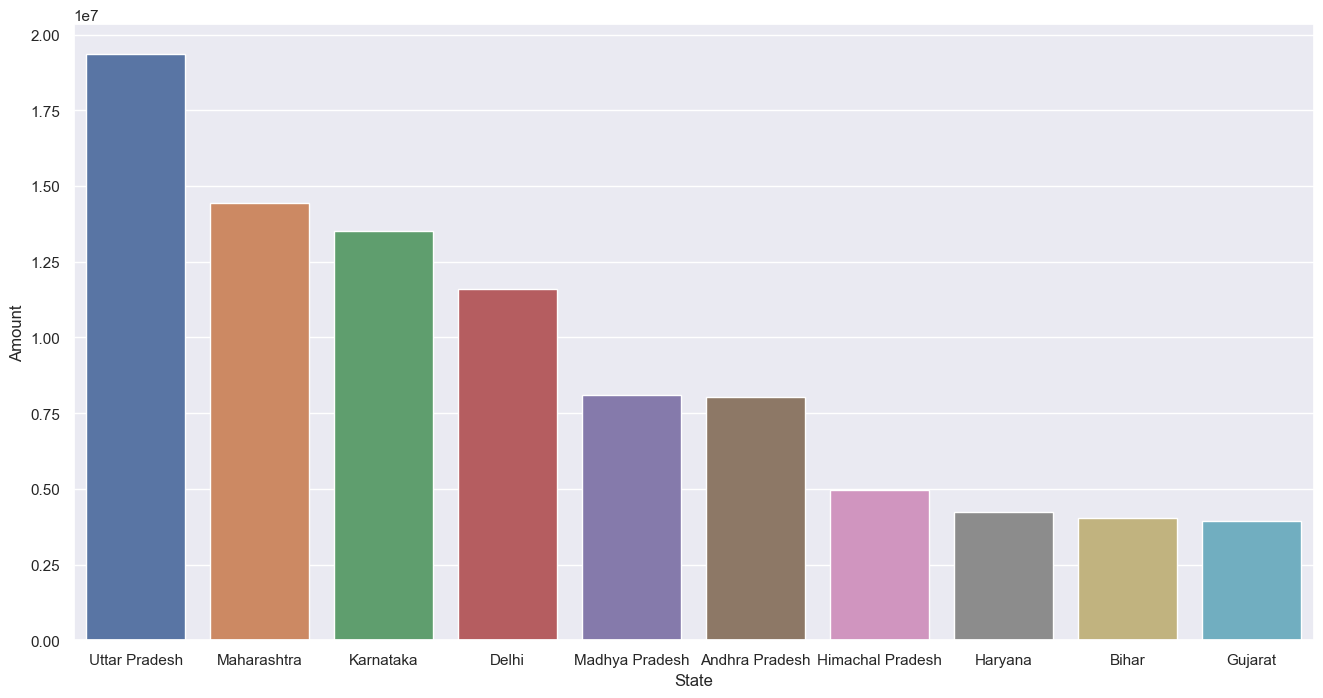

In [124]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State')



**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**


### Marital Status

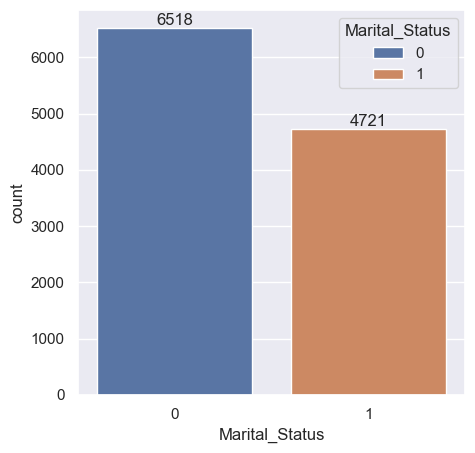

In [126]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

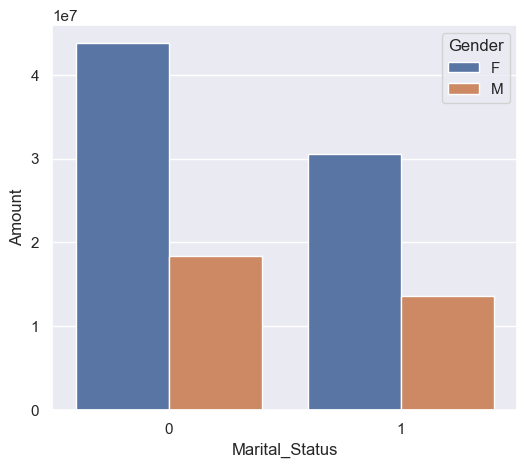

In [127]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

**From above graphs we can see that most of the buyers are married (women) and they have high purchasing power**

### Occupation

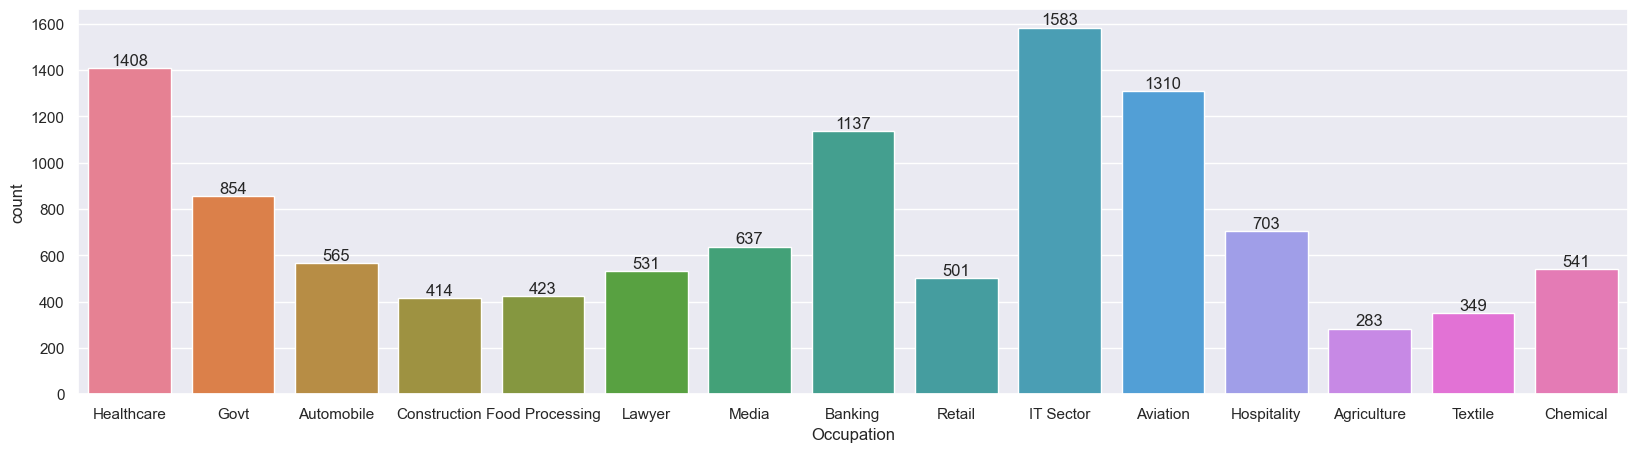

In [128]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

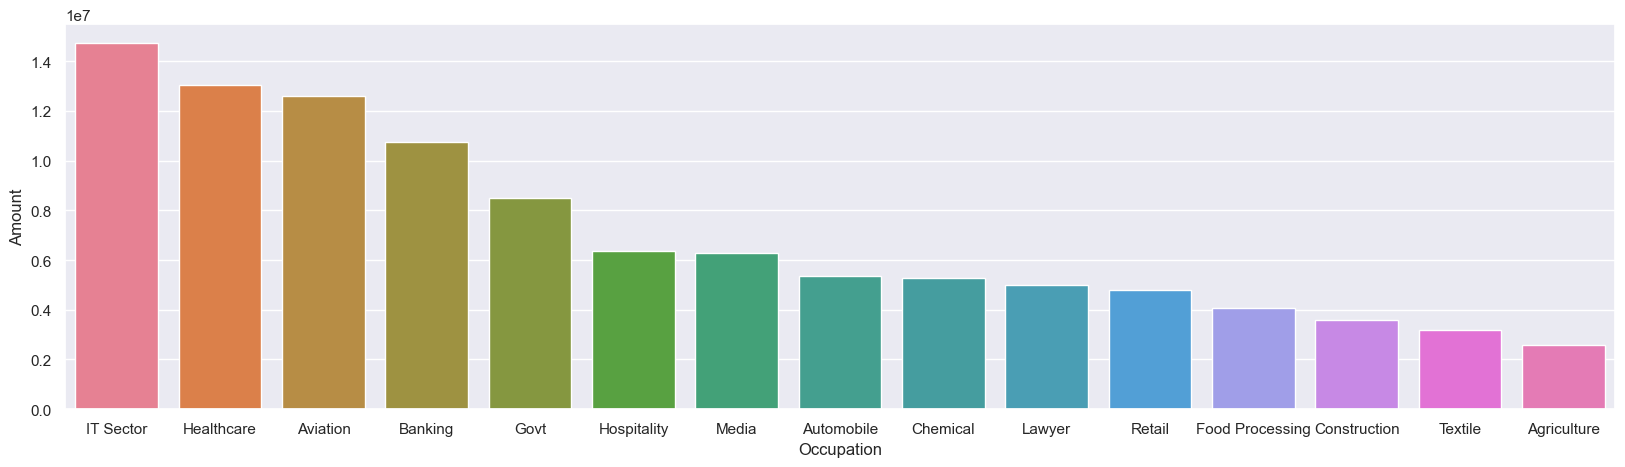

In [129]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',hue='Occupation')

**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

### Product Category

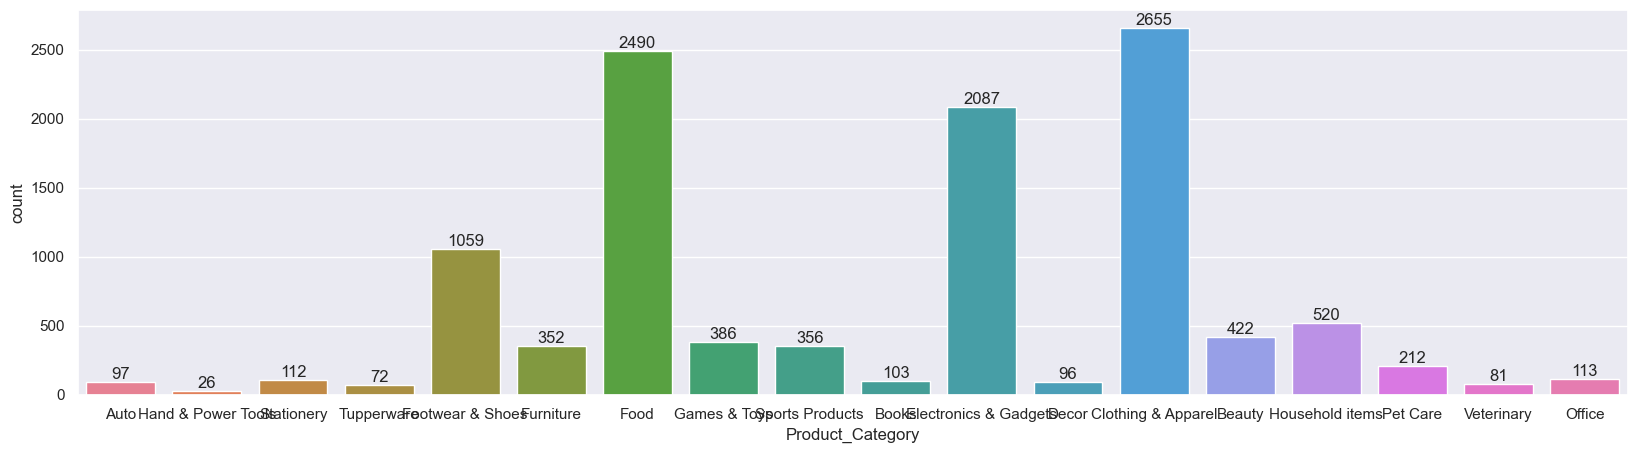

In [135]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category')
sns.set(rc={'figure.figsize':(50,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

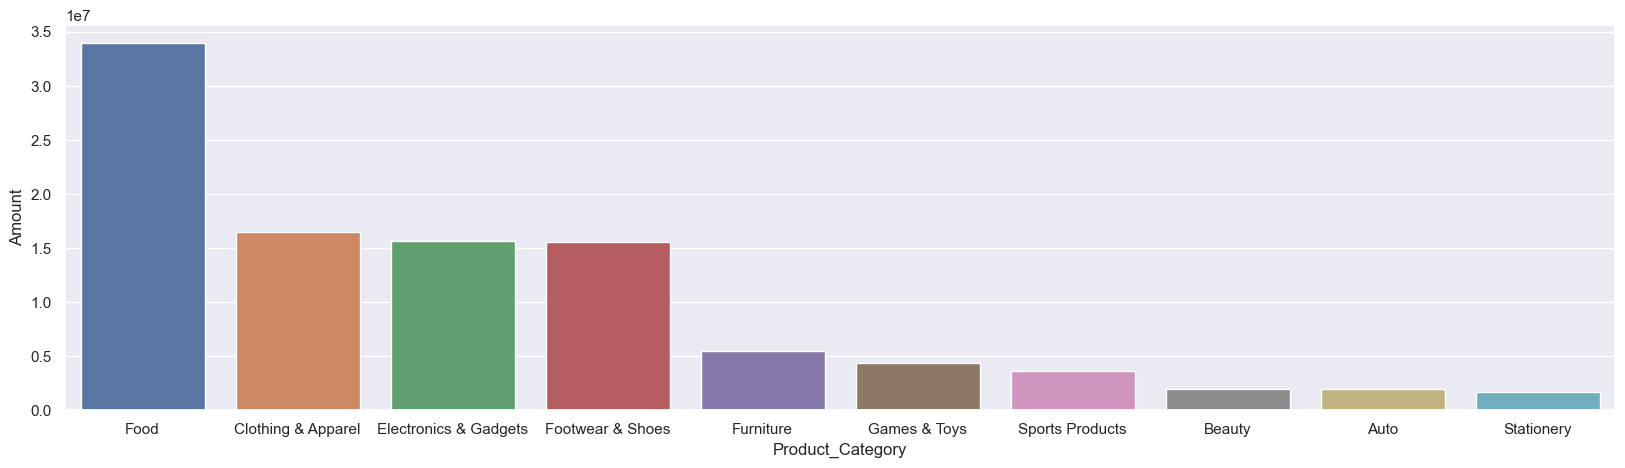

In [136]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category')

**From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category**

<Axes: xlabel='Product_ID', ylabel='Orders'>

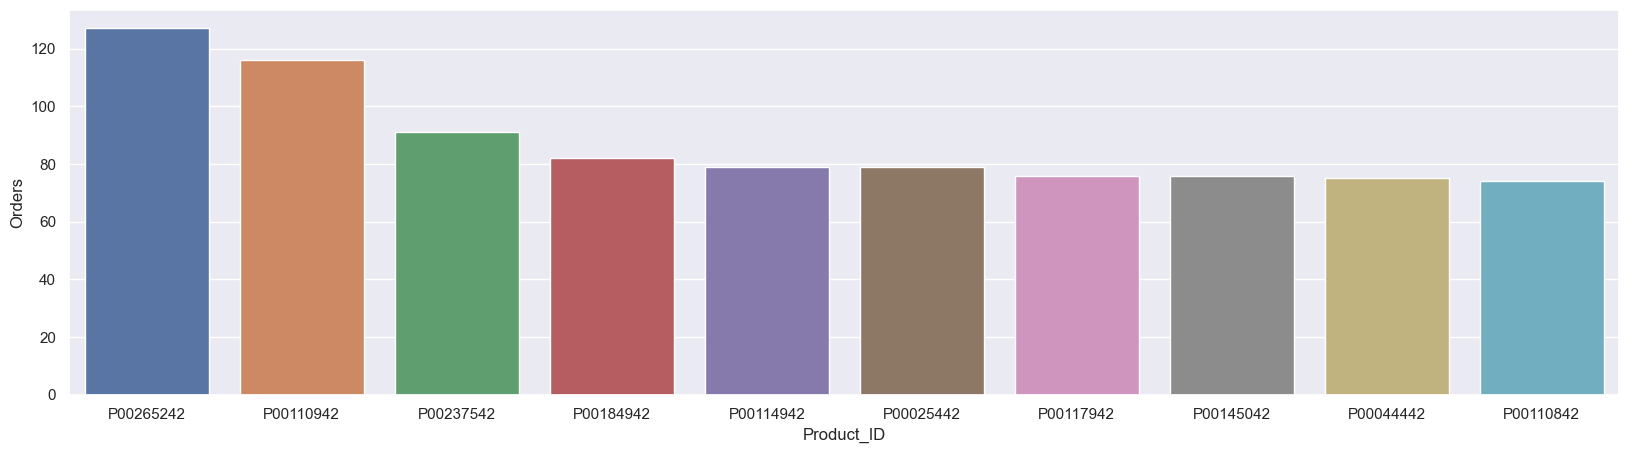

In [137]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID')

<Axes: xlabel='Product_ID'>

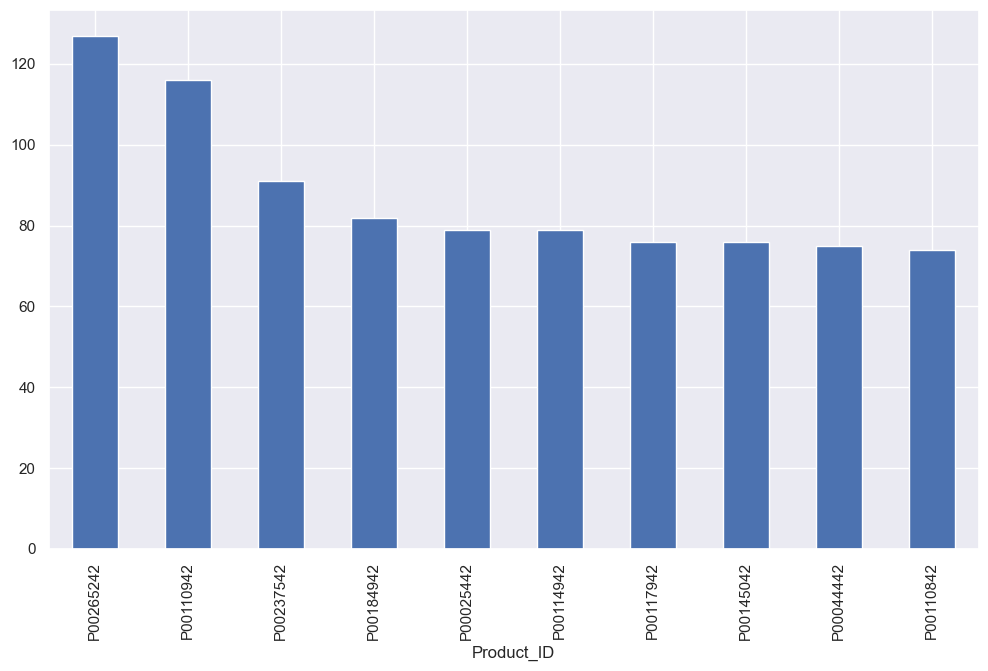

In [138]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

__**Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.**__